In [1]:
# Célula 1 — importar libs e ver o ambiente

import sys
import pandas as pd
import matplotlib.pyplot as plt

print(sys.executable)   # confirma que está usando o Python do .venv
print("pandas", pd.__version__)

C:\Users\allan\AppData\Local\Programs\Python\Python314\python.exe
pandas 2.3.3


In [2]:
# Célula 2 — carregar os dados processados (arquivo criado pelo script)

from pathlib import Path
ROOT = Path.cwd().parents[0]  # ajusta se o notebook abrir em outra pasta; teste e ajuste se necessário
proc = ROOT / "data" / "processed"
df_precip = pd.read_parquet(proc / "inmet_precip_hourly.parquet")
df_precip.head()

,datetime,precip_mm
0,2018-01-01 00:00:00,0.0
1,2018-01-01 01:00:00,0.0
2,2018-01-01 02:00:00,0.0
3,2018-01-01 03:00:00,0.0
4,2018-01-01 04:00:00,0.0


In [3]:
# Célula 3 — olhar estatísticas básicas

df_precip['precip_mm'].describe()

count    8457.000000
mean    -1604.418233
std      3670.164180
min     -9999.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.000000
Name: precip_mm, dtype: float64

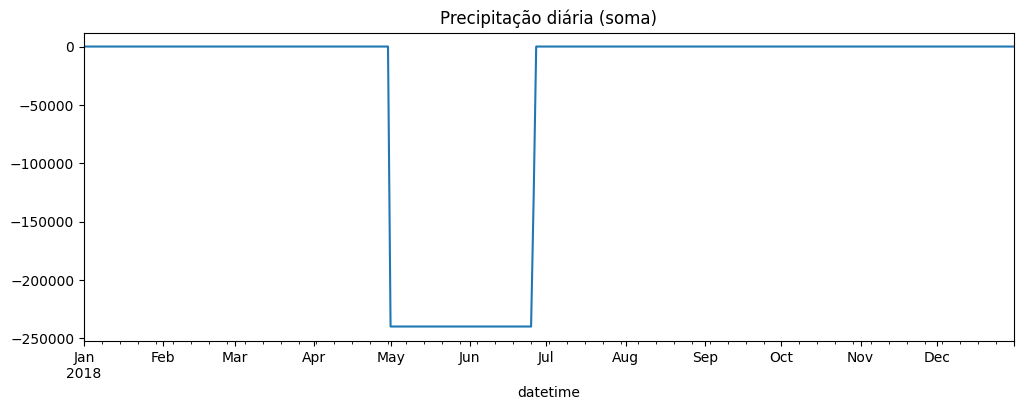

In [4]:
# Célula 4 — converter (se necessário) e plotar série temporal

df_precip['datetime'] = pd.to_datetime(df_precip['datetime'])
df_precip = df_precip.set_index('datetime').sort_index()
df_precip['precip_mm'].resample('D').sum().plot(figsize=(12,4), title='Precipitação diária (soma)');
plt.show()

In [5]:
# Célula 5 — carregar features semanais (se já tiver sido gerado)

df_weekly = pd.read_parquet(proc / "precip_weekly.parquet")
df_weekly.head()

,week_end_date,precip_mm_weekly
0,2018-01-07,0.0
1,2018-01-14,0.0
2,2018-01-21,0.0
3,2018-01-28,0.0
4,2018-02-04,0.0


In [6]:
# Célula 6 — inspecionar o CSV do ADEMA extraído

df_adema = pd.read_csv(proc / "adema_aracaju_raw.csv", encoding='utf-8')
df_adema.head(10)

,code,site,values
0,AVS003M,Praia de Atalaia Velha – Em frente aos Arcos d...,"33,4,5,92,7"
1,AVS005M,Praia do Banho Doce – Em frente ao Chafariz – Aju,"6,6,11,14,4"
2,AVS007M,Praia do Bonanza – Em frente ao Hotel Parque d...,"11,2,6,72,13"
3,AVS008M,Praia do Hawaizinho - Em frente a Praça de Eve...,"3,6,6,102,6"
4,AVS009M,Praia de Aruana – Em frente ao Loteamento Arua...,"10,51,43,19,24"
5,AVS010M,Praia do Robalo – Em frente ao Clube do Banco ...,"4,4,42,10,53"
6,AVS011M,Praia de Atalaia Nova – Em frente ao Farol da ...,"12,81,1,11,42"
7,AVS012M,Praia dos Náufragos – Em frente ao Condomínio ...,"3,4,2,48,3"
8,S01024R,Praia dos Artistas – Coroa do Meio em frente a...,"59,26,45,400,15"
9,S01047R,Coqueiros . * Todas Próprias Administração Est...,"0,3,1,2,5"
